In [1]:
import netCDF4 as nc4
import numpy as np
import pandas as pd
#import seaborn as sns
import matplotlib.pyplot as plt
import dateutil.parser
import datetime as dt
import scipy
import xarray as xr
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
from netCDF4 import Dataset
from netCDF4 import num2date
import pandas as pd

import cartopy.feature as cfeat
import os
import numpy as np
from cartopy import config

# from mpl_toolkits.basemap import Basemap

In [2]:
# Can move other files in this directory somewhere else so that this can be done more elegantly instead of just reading from a big list!

fnames = ['/home/disk/eos3/aswann/Shared/Data/forestmaps/hansen_landsat_forestloss/Hansen_GFC-2019-v1.7_lossyear_10N_080W.nc',
 '/home/disk/eos3/aswann/Shared/Data/forestmaps/hansen_landsat_forestloss/Hansen_GFC-2019-v1.7_lossyear_10N_070W.nc',
 '/home/disk/eos3/aswann/Shared/Data/forestmaps/hansen_landsat_forestloss/Hansen_GFC-2019-v1.7_lossyear_10N_060W.nc',
 '/home/disk/eos3/aswann/Shared/Data/forestmaps/hansen_landsat_forestloss/Hansen_GFC-2019-v1.7_lossyear_00N_080W.nc',
 '/home/disk/eos3/aswann/Shared/Data/forestmaps/hansen_landsat_forestloss/Hansen_GFC-2019-v1.7_lossyear_00N_070W.nc',
 '/home/disk/eos3/aswann/Shared/Data/forestmaps/hansen_landsat_forestloss/Hansen_GFC-2019-v1.7_lossyear_00N_060W.nc',
 '/home/disk/eos3/aswann/Shared/Data/forestmaps/hansen_landsat_forestloss/Hansen_GFC-2019-v1.7_lossyear_00N_050W.nc',
 '/home/disk/eos3/aswann/Shared/Data/forestmaps/hansen_landsat_forestloss/Hansen_GFC-2019-v1.7_lossyear_10S_080W.nc',
 '/home/disk/eos3/aswann/Shared/Data/forestmaps/hansen_landsat_forestloss/Hansen_GFC-2019-v1.7_lossyear_10S_070W.nc',
 '/home/disk/eos3/aswann/Shared/Data/forestmaps/hansen_landsat_forestloss/Hansen_GFC-2019-v1.7_lossyear_10S_060W.nc',
 '/home/disk/eos3/aswann/Shared/Data/forestmaps/hansen_landsat_forestloss/Hansen_GFC-2019-v1.7_lossyear_10S_050W.nc',
 '/home/disk/eos3/aswann/Shared/Data/forestmaps/hansen_landsat_forestloss/Hansen_GFC-2019-v1.7_lossyear_20S_070W.nc',
 '/home/disk/eos3/aswann/Shared/Data/forestmaps/hansen_landsat_forestloss/Hansen_GFC-2019-v1.7_lossyear_20S_060W.nc',
 '/home/disk/eos3/aswann/Shared/Data/forestmaps/hansen_landsat_forestloss/Hansen_GFC-2019-v1.7_lossyear_20S_050W.nc',
 '/home/disk/eos3/aswann/Shared/Data/forestmaps/hansen_landsat_forestloss/Hansen_GFC-2019-v1.7_lossyear_00N_040W.nc',
 '/home/disk/eos3/aswann/Shared/Data/forestmaps/hansen_landsat_forestloss/Hansen_GFC-2019-v1.7_lossyear_50N_130W.nc',
 '/home/disk/eos3/aswann/Shared/Data/forestmaps/hansen_landsat_forestloss/Hansen_GFC-2019-v1.7_lossyear_50N_120W.nc',
 '/home/disk/eos3/aswann/Shared/Data/forestmaps/hansen_landsat_forestloss/Hansen_GFC-2019-v1.7_lossyear_40N_130W.nc',
 '/home/disk/eos3/aswann/Shared/Data/forestmaps/hansen_landsat_forestloss/Hansen_GFC-2019-v1.7_lossyear_40N_120W.nc',
 '/home/disk/eos3/aswann/Shared/Data/forestmaps/hansen_landsat_forestloss/Hansen_GFC-2019-v1.7_lossyear_60N_140W.nc',
 '/home/disk/eos3/aswann/Shared/Data/forestmaps/hansen_landsat_forestloss/Hansen_GFC-2019-v1.7_lossyear_60N_130W.nc',
 '/home/disk/eos3/aswann/Shared/Data/forestmaps/hansen_landsat_forestloss/Hansen_GFC-2019-v1.7_lossyear_60N_120W.nc',
 '/home/disk/eos3/aswann/Shared/Data/forestmaps/hansen_landsat_forestloss/Hansen_GFC-2019-v1.7_lossyear_60N_110W.nc',
 '/home/disk/eos3/aswann/Shared/Data/forestmaps/hansen_landsat_forestloss/Hansen_GFC-2019-v1.7_lossyear_50N_110W.nc',
 '/home/disk/eos3/aswann/Shared/Data/forestmaps/hansen_landsat_forestloss/Hansen_GFC-2019-v1.7_lossyear_40N_110W.nc',
 '/home/disk/eos3/aswann/Shared/Data/forestmaps/hansen_landsat_forestloss/Hansen_GFC-2019-v1.7_lossyear_30N_100W.nc',
 '/home/disk/eos3/aswann/Shared/Data/forestmaps/hansen_landsat_forestloss/Hansen_GFC-2019-v1.7_lossyear_20N_090W.nc']

## Plot each tile separately

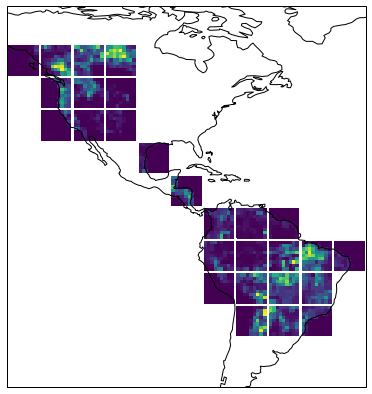

In [3]:
# Plots each square one at a time
projection = ccrs.PlateCarree()
fig= plt.figure(figsize=(7,7))
ax1 = plt.axes(projection=projection)
ax1.set_global()
ax1.coastlines()
ax1.set_extent([-140, -30, -30, 60])

for fname in fnames:
    ds_orig = xr.open_dataset(fname)
    #cyclic_data, cyclic_lons = add_cyclic_point(ds_orig['Percent'].mean(dim='year'), coord=ds_orig['lon'])
    cs = plt.pcolor(ds_orig['lon'], ds_orig['lat'], ds_orig['Percent'].mean(dim='year'),
                            transform=ccrs.PlateCarree(), vmin=0, vmax=0.02)
#cs = plt.pcolor(ds_orig['lon'], ds_orig['lat'], ds_orig['Percent'].mean(dim='year'),
#                            transform=ccrs.PlateCarree())

Find out how many unique latitude and longitude coordinates we should have

In [7]:
lons_all = []
lats_all = []
for fname in fnames:
    ds_orig = xr.open_dataset(fname)
    #print('--------------')
    #print(np.shape(ds_orig['lon'].values))
    for val in ds_orig['lon'].values:
        lons_all.append(val)
    for val in ds_orig['lat'].values:
        lats_all.append(val)
        
print('# Unique Longitude Coords: '+str(np.shape(np.unique(lons_all))))
print('# Unique Latitude Coords: '+str(np.shape(np.unique(lats_all))))

# Unique Longitude Coords: (110,)
# Unique Latitude Coords: (90,)


## Reformat tiles

In [8]:
# Change this to wherever you want these files to go
outpath = '/home/disk/p/czarakas/temp/'

In [9]:
for fname in fnames:
    ds_orig = xr.open_dataset(fname)
    da_orig_mean = ds_orig['Percent']
    da = xr.DataArray(
    data=da_orig_mean.values,
    dims=["lat", "lon", "year"],
        coords=dict(
            lon=(da_orig_mean.lon),
            lat=(da_orig_mean.lat),
            year=(da_orig_mean.year),
        )
    )
    
    ds = da.to_dataset(name='Percent')

    fname_out_prefix = fname.split('/home/disk/eos3/aswann/Shared/Data/forestmaps/hansen_landsat_forestloss/')[1].split('.nc')[0]
    fname_out = fname_out_prefix+'_CZ.nc'
    ds.to_netcdf(outpath+fname_out)

## Load tiles and plot together

In [10]:
ds_merged = xr.open_mfdataset(outpath+'*.nc', combine='by_coords')

/home/disk/p/czarakas/anaconda3/envs/plants_and_TCR_v3/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


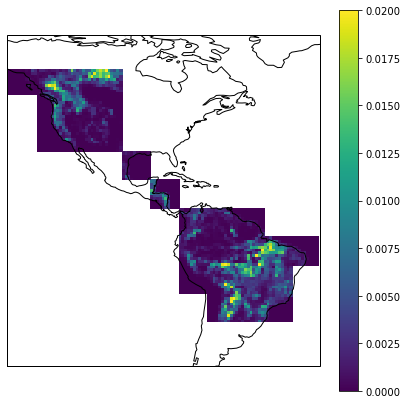

In [11]:
projection = ccrs.PlateCarree()
fig= plt.figure(figsize=(7,7))
ax1 = plt.axes(projection=projection)
ax1.set_global()
ax1.coastlines()
ax1.set_extent([-140, -30, -30, 60])

    #cyclic_data, cyclic_lons = add_cyclic_point(ds_orig['Percent'].mean(dim='year'), coord=ds_orig['lon'])
cs = plt.pcolor(ds_merged['lon'], ds_merged['lat'], ds_merged['Percent'].mean(dim='year'),
                            transform=ccrs.PlateCarree(), vmin=0, vmax=0.02)
plt.colorbar()

# Sanity check for how file dimensions should work with pcolor

In [22]:
ds = xr.open_dataset('/eos9/czarakas/Data/CMIP6/CESM2/lai_Lmon_CESM2_abrupt-4xCO2_r1i1p1f1_gn_070001-074912.nc').mean(dim='time')

/home/disk/p/czarakas/anaconda3/envs/plants_and_TCR_v3/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'lai' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  use_cftime=use_cftime,
/home/disk/p/czarakas/anaconda3/envs/plants_and_TCR_v3/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


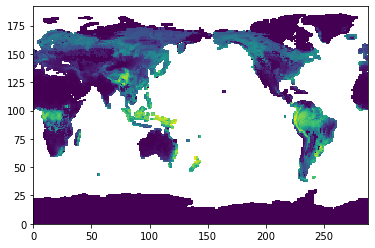

In [23]:
plt.pcolor(ds['lai'].values)

In [24]:
print('LAI: '+str(np.shape(ds['lai'])))
print('Lon: '+str(np.shape(ds['lon'])))
print('Lat: '+str(np.shape(ds['lat'])))

LAI: (192, 288)
Lon: (288,)
Lat: (192,)


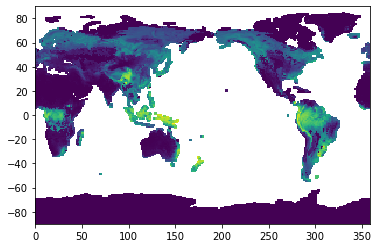

In [25]:
plt.pcolor(ds['lon'],ds['lat'], ds['lai'].values)